In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import linregress
from scipy.stats import spearmanr

In [1]:
def plot_cos_sims(x_df, y_df, x_gene, y_gene, output_folder):
    y_df = y_df.drop('disease', axis=1)
    x_df['norm_euclidean_dist'] = x_df['euclidean_distance']/max([x_df['euclidean_distance'].max(),y_df['euclidean_distance'].max()])
    y_df['norm_euclidean_dist'] = y_df['euclidean_distance']/max([x_df['euclidean_distance'].max(),y_df['euclidean_distance'].max()])
    
    slope, intercept, r_value, p_value, std_err = linregress(x_df['norm_euclidean_dist'], y_df['norm_euclidean_dist'])
    # Display the equation of the regression line on the plot
    equation = f'y = {slope:.3f}x + {intercept:.3f}'  # Format the equation
    
    comb_df = x_df.join(y_df, lsuffix = f'_{x_gene}', rsuffix = f'_{y_gene}')
    
    plt.figure(figsize=(6,4))
    sns.regplot(x=f'norm_euclidean_dist_{x_gene}',
                y=f'norm_euclidean_dist_{y_gene}',
                data=comb_df,
                ci=None,
                scatter_kws={"s": 10, "alpha": 0.3},
                line_kws={"linewidth": 1.5, "alpha": 0.7})
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.text(0.05, 0.8, equation, fontsize=8, color='red')
    plt.text(0.05, 0.85, f'$R^2$ = {r_value ** 2:.3f}', fontsize=8, color='red')
    
    plt.savefig(f'{output_path}{x_gene}_vs_{y_gene}.png')
    plt.show()

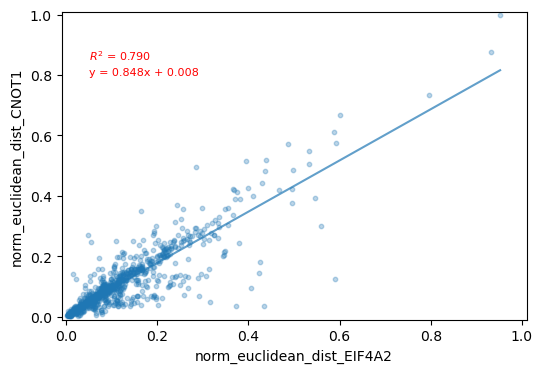

In [89]:
x_df = pd.read_csv("/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/eif4a2/in_silico_overexpress_eif4a2_dict_1Kbatch_euclidean_dists.csv", index_col=0)
y_df = pd.read_csv("/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/cnot1/in_silico_overexpress_cnot1_dict_1Kbatch_euclidean_dists.csv", index_col=0)
output_path = "/mnt/scratchc/ghlab/toby/in_silico_perturb_data/extracted_emb_plots/euclidean_scatters/"
plot_cos_sims(x_df, y_df, "EIF4A2", "CNOT1", output_path)

In [8]:
def plotCosVsEuc(cos_df, euc_df):
    cos_df['rank'] = cos_df['cosine_similarity'].rank()
    euc_df['rank'] = euc_df['euclidean_distance'].rank()
    
    slope, intercept, r_value, p_value, std_err = linregress(cos_df['rank'], euc_df['rank'])
    rho, p_value = spearmanr(cos_df['cosine_similarity'],euc_df['euclidean_distance'])
    
    # Display the equation of the regression line on the plot
    equation = f'y = {slope:.3f}x + {intercept:.3f}'
    
    sns.regplot(x=cos_df['rank'],
                y=euc_df['rank'],
                ci=None,
                scatter_kws={"s": 5, "alpha": 0.3},
                line_kws={"linewidth": 1, "alpha": 0.8, "color":"red"})
    plt.text(0, 200, equation, fontsize=8, color='red')
    plt.text(0, 250, f'$R^2$ = {r_value ** 2:.3f}', fontsize=8, color='red')
    plt.text(0, 300, f"Spearman's rho: {rho:.3f}", fontsize=8, color='red')
    plt.xlabel('cosine similarity rank')
    plt.ylabel('euclidean distance rank')
    plt.show()

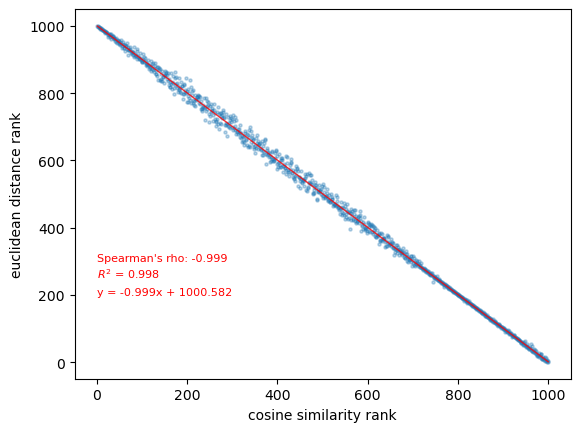

In [9]:
euc_df = pd.read_csv("/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/ccr4not/in_silico_overexpress_ccr4not_dict_1Kbatch_euclidean_dists.csv", index_col=0)
cos_df = pd.read_csv("/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/ccr4not/in_silico_overexpress_ccr4not_dict_1Kbatch_cos_sims.csv", index_col=0)
plotCosVsEuc(cos_df, euc_df)